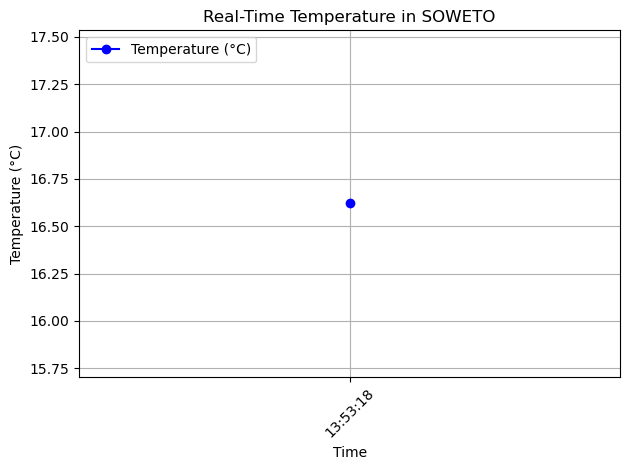

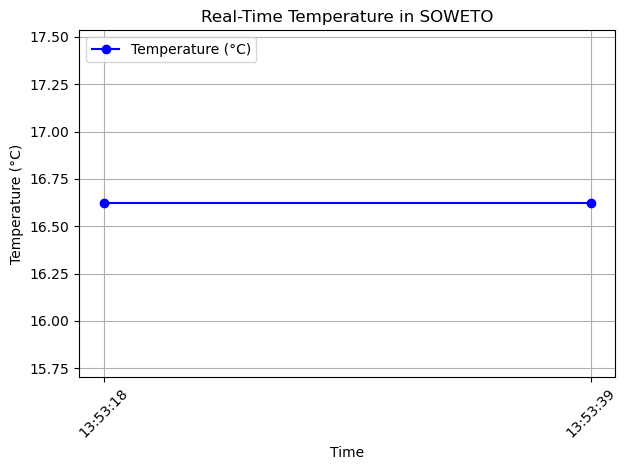

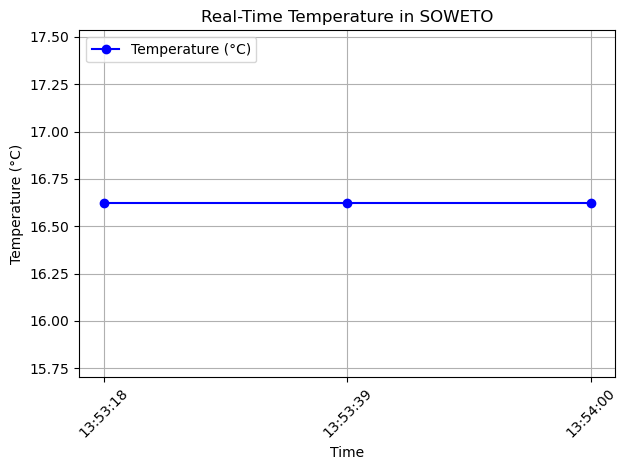

In [1]:
import requests
import time
import matplotlib.pyplot as plt

# Function to fetch real-time weather data
def fetch_weather_data(city, api_key):
    """
    Fetch the current temperature of a city from the OpenWeatherMap API.
    
    Parameters:
        city: Name of the city (e.g., "SOWETO").
        api_key: 69f7f41eee041e1c6c887f283be86176.
    
    Returns:
        (timestamp, temperature): A tuple containing the current timestamp and temperature in Celsius.
    """
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    response = requests.get(url)
    data = response.json()
    
    if response.status_code == 200:
        timestamp = time.strftime("%H:%M:%S")
        temperature = data["main"]["temp"]
        return timestamp, temperature
    else:
        raise Exception(f"Error fetching data: {data.get('message', 'Unknown error')}")

# Real-time data visualization function
def visualize_real_time_weather(city, api_key, duration=60, interval=5):
    """
    Visualize real-time weather data (temperature) for a given city.
    
    Parameters:
        city: Name of the city (e.g., "SOWETO").
        api_key: 69f7f41eee041e1c6c887f283be86176.
        duration: Total duration of visualization in seconds.
        interval: Time interval between updates in seconds.
    """
    start_time = time.time()
    timestamps = []
    temperatures = []
    
    plt.ion()  # Enable interactive mode for live updates
    
    while time.time() - start_time < duration:
        try:
            # Fetch current weather data
            timestamp, temperature = fetch_weather_data(city, api_key)
            
            # Append data to lists
            timestamps.append(timestamp)
            temperatures.append(temperature)
            
            # Plot the data
            plt.clf()
            plt.plot(timestamps, temperatures, marker='o', linestyle='-', color='blue', label="Temperature (°C)")
            plt.title(f"Real-Time Temperature in {city}")
            plt.xlabel("Time")
            plt.ylabel("Temperature (°C)")
            plt.xticks(rotation=45)
            plt.legend(loc="upper left")
            plt.grid()
            plt.tight_layout()
            plt.pause(interval)  # Pause to allow updates
            
            # Wait before the next API call
            time.sleep(interval)
        except Exception as e:
            print(f"Error: {e}")
            break
    
    plt.ioff()  # Disable interactive mode
    plt.show()

# Run the simulation
if __name__ == "__main__":
    API_KEY ="69f7f41eee041e1c6c887f283be86176" # Replace with your OpenWeatherMap API key
    CITY = "SOWETO"           # Replace with the city of your choice
    DURATION = 60             # Total duration of visualization in seconds
    INTERVAL = 10             # Time interval between updates in seconds

    visualize_real_time_weather(CITY, API_KEY, duration=DURATION, interval=INTERVAL)
